In [1]:
from scipy.optimize import rosen, rosen_der, rosen_hess, rosen_hess_prod, minimize
from matplotlib import pyplot as plt
import numpy as np
import time
import pandas as pd
%matplotlib inline

### nice tutorial
http://www.scipy-lectures.org/advanced/mathematical_optimization/

Rosenbrock function:
https://en.wikipedia.org/wiki/Rosenbrock_function

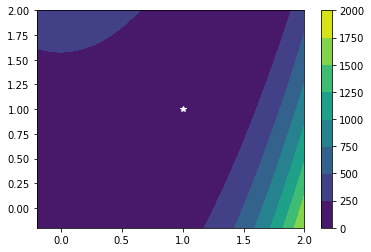

In [2]:
x = np.linspace(-0.2, 2, 101)
xx, yy = np.array(np.meshgrid(x, x))
plt.contourf(x, x, rosen([xx, yy]))
plt.plot(1,1,'w*')
plt.colorbar()

### Solving equations:

Newton's method:
https://en.wikipedia.org/wiki/Newton%27s_method

Secant method:
https://en.wikipedia.org/wiki/Secant_method

Broyden's method:
https://en.wikipedia.org/wiki/Broyden%27s_method

### Optimization

Nelder-Mead algorithm:
https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method

BFGS algorithm:
https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

In [3]:
minimize(rosen, [2,3], method = 'Nelder-Mead')

 final_simplex: (array([[0.99998529, 0.99997065],
       [1.00002239, 1.00004372],
       [1.00002909, 1.00005993]]), array([2.17177653e-10, 6.13513659e-10, 1.15113945e-09]))
           fun: 2.1717765323851955e-10
       message: 'Optimization terminated successfully.'
          nfev: 158
           nit: 84
        status: 0
       success: True
             x: array([0.99998529, 0.99997065])

In [4]:
minimize(rosen, [2,3], method = 'BFGS', jac = rosen_der)

      fun: 1.3831659900787323e-15
 hess_inv: array([[0.47650293, 0.95190424],
       [0.95190424, 1.90655387]])
      jac: array([ 5.64772996e-07, -3.16053139e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 22
     njev: 27
   status: 0
  success: True
        x: array([0.99999997, 0.99999993])

In [5]:
minimize(rosen, [2,3], method = 'BFGS')

      fun: 2.0358652374859528e-11
 hess_inv: array([[0.47656557, 0.95202562],
       [0.95202562, 1.90678873]])
      jac: array([ 5.61677753e-07, -3.14229220e-07])
  message: 'Optimization terminated successfully.'
     nfev: 108
      nit: 22
     njev: 27
   status: 0
  success: True
        x: array([0.99999549, 0.99999097])

In [6]:
minimize(rosen, [0,3], method = 'Newton-CG', jac = rosen_der, hess = rosen_hess)

     fun: 7.72343981564415e-15
     jac: array([ 2.90996478e-05, -1.46085845e-05])
 message: 'Optimization terminated successfully.'
    nfev: 52
    nhev: 35
     nit: 35
    njev: 86
  status: 0
 success: True
       x: array([0.99999991, 0.99999982])

In [82]:
points = np.random.random((100, 2))*10-5
methods = [
    {'name': 'Nelder-Mead', 'method': 'Nelder-Mead', 'jac' : None, 'hess' : None},
    {'name': 'Powell', 'method': 'Powell', 'jac' : None, 'hess' : None},
    {'name': 'BFGS no jac', 'method': 'BFGS', 'jac' : None, 'hess' : None},
    {'name': 'BFGS', 'method': 'BFGS', 'jac' : rosen_der, 'hess' : None},
    {'name': 'L-BFGS-B no jac', 'method': 'L-BFGS-B', 'jac' : None, 'hess' : None},
    {'name': 'L-BFGS-B', 'method': 'L-BFGS-B', 'jac' : rosen_der, 'hess' : None},
    {'name': 'Newton-CG no hess', 'method': 'Newton-CG', 'jac' : rosen_der, 'hess' : None},
    {'name': 'Newton-CG', 'method': 'Newton-CG', 'jac' : rosen_der, 'hess' : rosen_hess}
]

data = []
solution_x = np.array([1,1])
solution_fun = 0

for method_json in methods:
    print('Running', method_json['name'])
    
    for point in points:
        t = time.time()
        try:
            res = minimize(rosen, point, method = method_json['method'],
                           jac = method_json['jac'], hess = method_json['hess'])
        except:
            pass
        
        try:
            njev = res.njev
        except:
            njev = 0
        try:
            nhev = res.nhev
        except:
            nhev = 0
        data.append([method_json['name'], np.abs(res.fun - solution_fun), 
                    np.linalg.norm(solution_x - res.x),
                    res.nfev, njev, nhev, res.nit, time.time() - t])

Running Nelder-Mead
Running Powell
Running BFGS no jac
Running BFGS
Running L-BFGS-B no jac
Running L-BFGS-B
Running Newton-CG no hess
Running Newton-CG


In [83]:
df = pd.DataFrame(data, columns = ['method', 'delta_fun', 'delta_x', 'nfev', 'njev', 'nhev', 'nit', 't'])

In [84]:
df.groupby('method').median()

,delta_fun,delta_x,nfev,njev,nhev,nit,t
method,,,,,,,
BFGS,3.053659e-15,8.007213e-08,57.5,57.5,0.0,45.5,0.007
BFGS no jac,2.004611e-11,1.001689e-05,256.0,64.0,0.0,46.5,0.008
L-BFGS-B,1.344103e-14,1.896649e-07,41.5,0.0,0.0,33.0,0.003
L-BFGS-B no jac,9.073154e-12,6.735180e-06,127.5,0.0,0.0,33.0,0.003
Nelder-Mead,4.207443e-10,2.779476e-05,159.0,0.0,0.0,85.0,0.005
Newton-CG,3.114281e-12,3.949211e-06,55.0,95.0,41.0,41.0,0.010
Newton-CG no hess,2.300349e-12,3.393637e-06,57.0,226.0,0.0,41.0,0.012
Powell,2.310500e-29,7.275123e-15,529.5,0.0,0.0,18.0,0.014


In [8]:
points = np.random.random((100, 10))*10-5
methods = [
    {'name': 'Nelder-Mead', 'method': 'Nelder-Mead', 'jac' : None, 'hess' : None},
    {'name': 'Powell', 'method': 'Powell', 'jac' : None, 'hess' : None},
    {'name': 'BFGS no jac', 'method': 'BFGS', 'jac' : None, 'hess' : None},
    {'name': 'BFGS', 'method': 'BFGS', 'jac' : rosen_der, 'hess' : None},
    {'name': 'L-BFGS-B no jac', 'method': 'L-BFGS-B', 'jac' : None, 'hess' : None},
    {'name': 'L-BFGS-B', 'method': 'L-BFGS-B', 'jac' : rosen_der, 'hess' : None},
    {'name': 'Newton-CG no hess', 'method': 'Newton-CG', 'jac' : rosen_der, 'hess' : None},
    {'name': 'Newton-CG', 'method': 'Newton-CG', 'jac' : rosen_der, 'hess' : rosen_hess}
]

data = []
solution_x = np.array([1]*10)
solution_fun = 0

for method_json in methods:
    print('Running', method_json['name'])
    
    for point in points:
        t = time.time()
        res = minimize(rosen, point, method = method_json['method'],
                       jac = method_json['jac'], hess = method_json['hess'])
        try:
            njev = res.njev
        except:
            njev = 0
        try:
            nhev = res.nhev
        except:
            nhev = 0
        data.append([method_json['name'], np.abs(res.fun - solution_fun), 
                    np.linalg.norm(solution_x - res.x),
                    res.nfev, njev, nhev, res.nit, time.time() - t])

('Running', 'Nelder-Mead')
('Running', 'Powell')
('Running', 'BFGS no jac')
('Running', 'BFGS')
('Running', 'L-BFGS-B no jac')
('Running', 'L-BFGS-B')
('Running', 'Newton-CG no hess')
('Running', 'Newton-CG')


In [79]:
df = pd.DataFrame(data, columns = ['method', 'delta_fun', 'delta_x', 'nfev', 'njev', 'nhev', 'nit', 't'])

In [80]:
df.groupby('method').median()

,delta_fun,delta_x,nfev,njev,nhev,nit,t
method,,,,,,,
BFGS,2.236137e-14,5.178772e-08,134.0,134.0,0.0,118.5,0.015
BFGS no jac,6.015260e-11,1.541041e-05,1980.0,165.0,0.0,118.5,0.047
L-BFGS-B,1.541515e-10,3.568509e-06,87.0,0.0,0.0,72.5,0.006
L-BFGS-B no jac,1.952296e-10,1.147858e-05,957.0,0.0,0.0,72.5,0.018
Nelder-Mead,7.624811e+01,3.244311e+00,2000.0,0.0,0.0,1434.5,0.072
Newton-CG,3.274980e-09,1.015925e-04,72.0,131.0,60.0,60.0,0.015
Newton-CG no hess,2.811716e-09,1.007789e-04,69.0,666.5,0.0,57.5,0.029
Powell,1.542648e-20,2.644257e-11,6149.5,0.0,0.0,51.0,0.174
